In [1]:
from vanna.ollama import Ollama
from vanna.chromadb import ChromaDB_VectorStore


In [2]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'llama3:8b'})


In [3]:
vn.connect_to_sqlite('chinook.db')

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [4]:

df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)


Adding ddl: CREATE TABLE "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)


Delete of nonexisting embedding ID: 1-ddl
Add of existing embedding ID: 6bc29ab9-f24b-5174-851d-bfb5d214d7d2-ddl
Add of existing embedding ID: ea84418b-1a28-59b4-a1f4-2fb674208adc-ddl
Add of existing embedding ID: d51d6c77-3de3-5ad2-a23e-ba851316bdd0-ddl
Add of existing embedding ID: 90df7c1a-e4b4-5975-a2e1-713c8fa7f66f-ddl
Add of existing embedding ID: 0f111144-3373-5893-b925-68dd8a5e56bb-ddl
Add of existing embedding ID: 2f3abc46-57ff-5fed-b809-f343373971d3-ddl
Add of existing embedding ID: b76ad558-edb4-57f3-b1b3-dcfb4b1605c1-ddl
Add of existing embedding ID: b305e78f-be4e-54df-a40a-6ec55439912d-ddl
Add of existing embedding ID: 4cbfd7f8-d4e7-5d61-8399-82e582dc39cf-ddl
Add of existing embedding ID: 2e8a9e29-16a2-5fa0-8a09-40617dae470c-ddl
Add of existing embedding ID: 98bb3ef3-465c-54fa-94a3-ac17d55e801e-ddl
Add of existing embedding ID: 3a9c3fe7-c4b1-5398-8b66-703c0ab03902-ddl
Add of existing embedding ID: 3f05d2ed-4a98-5f96-8e6e-84370b34f0a4-ddl
Add of existing embedding ID: 858f3

Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)


Add of existing embedding ID: 90df7c1a-e4b4-5975-a2e1-713c8fa7f66f-ddl
Insert of existing embedding ID: 90df7c1a-e4b4-5975-a2e1-713c8fa7f66f-ddl
Add of existing embedding ID: 0f111144-3373-5893-b925-68dd8a5e56bb-ddl
Insert of existing embedding ID: 0f111144-3373-5893-b925-68dd8a5e56bb-ddl
Add of existing embedding ID: 2f3abc46-57ff-5fed-b809-f343373971d3-ddl
Insert of existing embedding ID: 2f3abc46-57ff-5fed-b809-f343373971d3-ddl


Adding ddl: CREATE TABLE "employees"
(
    [EmployeeId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [FirstName] NVARCHAR(20)  NOT NULL,
    [Title] NVARCHAR(30),
    [ReportsTo] INTEGER,
    [BirthDate] DATETIME,
    [HireDate] DATETIME,
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60),
    FOREIGN KEY ([ReportsTo]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE "genres"
(
    [GenreId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
)
Adding ddl: CREATE TABLE "invoices"
(
    [InvoiceId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [CustomerId] INTEGER  NOT NULL,
    [InvoiceDate] DATETIME  NOT NULL,
    [BillingAddress] NVARCHAR(70),
    [BillingCity] NVARCHAR(40),
    [BillingState] NVARCHAR(40),

Add of existing embedding ID: b76ad558-edb4-57f3-b1b3-dcfb4b1605c1-ddl
Insert of existing embedding ID: b76ad558-edb4-57f3-b1b3-dcfb4b1605c1-ddl
Add of existing embedding ID: b305e78f-be4e-54df-a40a-6ec55439912d-ddl
Insert of existing embedding ID: b305e78f-be4e-54df-a40a-6ec55439912d-ddl
Add of existing embedding ID: 4cbfd7f8-d4e7-5d61-8399-82e582dc39cf-ddl
Insert of existing embedding ID: 4cbfd7f8-d4e7-5d61-8399-82e582dc39cf-ddl
Add of existing embedding ID: 2e8a9e29-16a2-5fa0-8a09-40617dae470c-ddl
Insert of existing embedding ID: 2e8a9e29-16a2-5fa0-8a09-40617dae470c-ddl


Adding ddl: CREATE TABLE "invoice_items"
(
    [InvoiceLineId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [InvoiceId] INTEGER  NOT NULL,
    [TrackId] INTEGER  NOT NULL,
    [UnitPrice] NUMERIC(10,2)  NOT NULL,
    [Quantity] INTEGER  NOT NULL,
    FOREIGN KEY ([InvoiceId]) REFERENCES "invoices" ([InvoiceId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION,
    FOREIGN KEY ([TrackId]) REFERENCES "tracks" ([TrackId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE "media_types"
(
    [MediaTypeId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
)
Adding ddl: CREATE TABLE "playlists"
(
    [PlaylistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
)


Add of existing embedding ID: 98bb3ef3-465c-54fa-94a3-ac17d55e801e-ddl
Insert of existing embedding ID: 98bb3ef3-465c-54fa-94a3-ac17d55e801e-ddl
Add of existing embedding ID: 3a9c3fe7-c4b1-5398-8b66-703c0ab03902-ddl
Insert of existing embedding ID: 3a9c3fe7-c4b1-5398-8b66-703c0ab03902-ddl
Add of existing embedding ID: 3f05d2ed-4a98-5f96-8e6e-84370b34f0a4-ddl


Adding ddl: CREATE TABLE "playlist_track"
(
    [PlaylistId] INTEGER  NOT NULL,
    [TrackId] INTEGER  NOT NULL,
    CONSTRAINT [PK_PlaylistTrack] PRIMARY KEY  ([PlaylistId], [TrackId]),
    FOREIGN KEY ([PlaylistId]) REFERENCES "playlists" ([PlaylistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION,
    FOREIGN KEY ([TrackId]) REFERENCES "tracks" ([TrackId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE "tracks"
(
    [TrackId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(200)  NOT NULL,
    [AlbumId] INTEGER,
    [MediaTypeId] INTEGER  NOT NULL,
    [GenreId] INTEGER,
    [Composer] NVARCHAR(220),
    [Milliseconds] INTEGER  NOT NULL,
    [Bytes] INTEGER,
    [UnitPrice] NUMERIC(10,2)  NOT NULL,
    FOREIGN KEY ([AlbumId]) REFERENCES "albums" ([AlbumId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION,
    FOREIGN KEY ([GenreId]) REFERENCES "genres" ([GenreId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION,
    FOREIGN KEY ([MediaTypeId]) REFERENCES "

Insert of existing embedding ID: 3f05d2ed-4a98-5f96-8e6e-84370b34f0a4-ddl
Add of existing embedding ID: 858f392c-6e28-5914-93c3-d80231d8194d-ddl
Insert of existing embedding ID: 858f392c-6e28-5914-93c3-d80231d8194d-ddl
Add of existing embedding ID: 832eb78e-4f3d-5faa-84e7-489e6562528f-ddl
Insert of existing embedding ID: 832eb78e-4f3d-5faa-84e7-489e6562528f-ddl


Adding ddl: CREATE INDEX [IFK_CustomerSupportRepId] ON "customers" ([SupportRepId])
Adding ddl: CREATE INDEX [IFK_EmployeeReportsTo] ON "employees" ([ReportsTo])
Adding ddl: CREATE INDEX [IFK_InvoiceCustomerId] ON "invoices" ([CustomerId])


Add of existing embedding ID: 00e14e2c-9906-59b0-931c-592b21a3ae75-ddl
Insert of existing embedding ID: 00e14e2c-9906-59b0-931c-592b21a3ae75-ddl
Add of existing embedding ID: 203941f1-c599-5ffe-b1d2-17b000f4bdb8-ddl
Insert of existing embedding ID: 203941f1-c599-5ffe-b1d2-17b000f4bdb8-ddl
Add of existing embedding ID: a30e1f09-d1a0-5bf5-af23-9d9bab6a20e4-ddl
Insert of existing embedding ID: a30e1f09-d1a0-5bf5-af23-9d9bab6a20e4-ddl


Adding ddl: CREATE INDEX [IFK_InvoiceLineInvoiceId] ON "invoice_items" ([InvoiceId])
Adding ddl: CREATE INDEX [IFK_InvoiceLineTrackId] ON "invoice_items" ([TrackId])
Adding ddl: CREATE INDEX [IFK_PlaylistTrackTrackId] ON "playlist_track" ([TrackId])


Add of existing embedding ID: 9b110f62-bfc1-5bd1-bdd3-15a2d7f2c472-ddl
Insert of existing embedding ID: 9b110f62-bfc1-5bd1-bdd3-15a2d7f2c472-ddl
Add of existing embedding ID: ceeb0861-72b7-5dcb-98d8-8f23f1547a32-ddl
Insert of existing embedding ID: ceeb0861-72b7-5dcb-98d8-8f23f1547a32-ddl
Add of existing embedding ID: 67b6eda8-5677-5e4c-ab81-5790ecb666ac-ddl
Insert of existing embedding ID: 67b6eda8-5677-5e4c-ab81-5790ecb666ac-ddl
Add of existing embedding ID: 4837b30e-4aeb-58dc-9585-55c8116a4482-ddl
Insert of existing embedding ID: 4837b30e-4aeb-58dc-9585-55c8116a4482-ddl


Adding ddl: CREATE INDEX [IFK_TrackAlbumId] ON "tracks" ([AlbumId])
Adding ddl: CREATE INDEX [IFK_TrackGenreId] ON "tracks" ([GenreId])
Adding ddl: CREATE INDEX [IFK_TrackMediaTypeId] ON "tracks" ([MediaTypeId])
Adding ddl: CREATE TABLE sqlite_stat1(tbl,idx,stat)


Add of existing embedding ID: 37319c81-65f7-50ee-956b-795de244bee5-ddl
Insert of existing embedding ID: 37319c81-65f7-50ee-956b-795de244bee5-ddl


In [5]:
vn.get_training_data()

,id,question,content,training_data_type
0,28aa1608-b322-537b-9195-b3bfb17d8e4f-sql,how many albums,"SELECT COUNT(*) FROM ""albums""",sql
1,602c1a6c-98ec-5b4e-8c64-24f08d79348e-sql,how many unique customers?,"SELECT COUNT(DISTINCT CustomerId) \nFROM ""cust...",sql
2,632cdcf9-0b55-541c-a03a-6ed8ddca6117-sql,give me all customers who are not in the US,"SELECT * \nFROM ""customers""\nWHERE Country != ...",sql
3,70765ddc-3bf6-5219-aaf7-516fbcf7e061-sql,how many unique customers?,"SELECT COUNT(DISTINCT CustomerId) FROM ""custom...",sql
4,8ddd00ab-25ce-5b92-baee-30a2c98aee58-sql,only show Employees whose title is 'Sales Supp...,"SELECT * \nFROM ""employees""\nWHERE Title = 'Sa...",sql
5,909026ca-e114-5bdb-a288-d99fc4e3412e-sql,how many albums of Body Count,"SELECT COUNT(*) \nFROM ""albums"" A \nJOIN ""arti...",sql
6,cdb18135-167c-5ab1-baf5-748d8530a397-sql,"give me all customers with firstname, lastname...","SELECT FirstName, LastName, Country\nFROM ""cus...",sql
7,d2fd0f99-0a3d-576f-af74-37a37673e1ab-sql,What is the contact information for a specific...,SELECT * FROM my-table WHERE name = 'John Doe',sql
0,00e14e2c-9906-59b0-931c-592b21a3ae75-ddl,None,"CREATE INDEX [IFK_InvoiceCustomerId] ON ""invoi...",ddl
1,0f111144-3373-5893-b925-68dd8a5e56bb-ddl,None,"CREATE TABLE ""employees""\r\n(\r\n [Employee...",ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    [InvoiceId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [CustomerId] INTEGER  NOT NULL,\r\n    [InvoiceDate] DATETIME  NOT NULL,\r\n    [BillingAddress] NVARCHAR(70),\r\n    [BillingCity] NVARCHAR(40),\r\n    [BillingState] NVARCHAR(40),\r\n    [BillingCountry] NVARCHAR(40),\r\n    [BillingPostalCode] NVARCHAR(10),\r\n    [Total] NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY ([CustomerId]) REFERENCES "customers" ([CustomerId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [FirstName] NVARCHAR(40)  NOT NULL,\r\n    [LastName] NVARCHAR(20)  NOT NULL,\r\n    [Company] NVARCHAR(80),\r\n

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


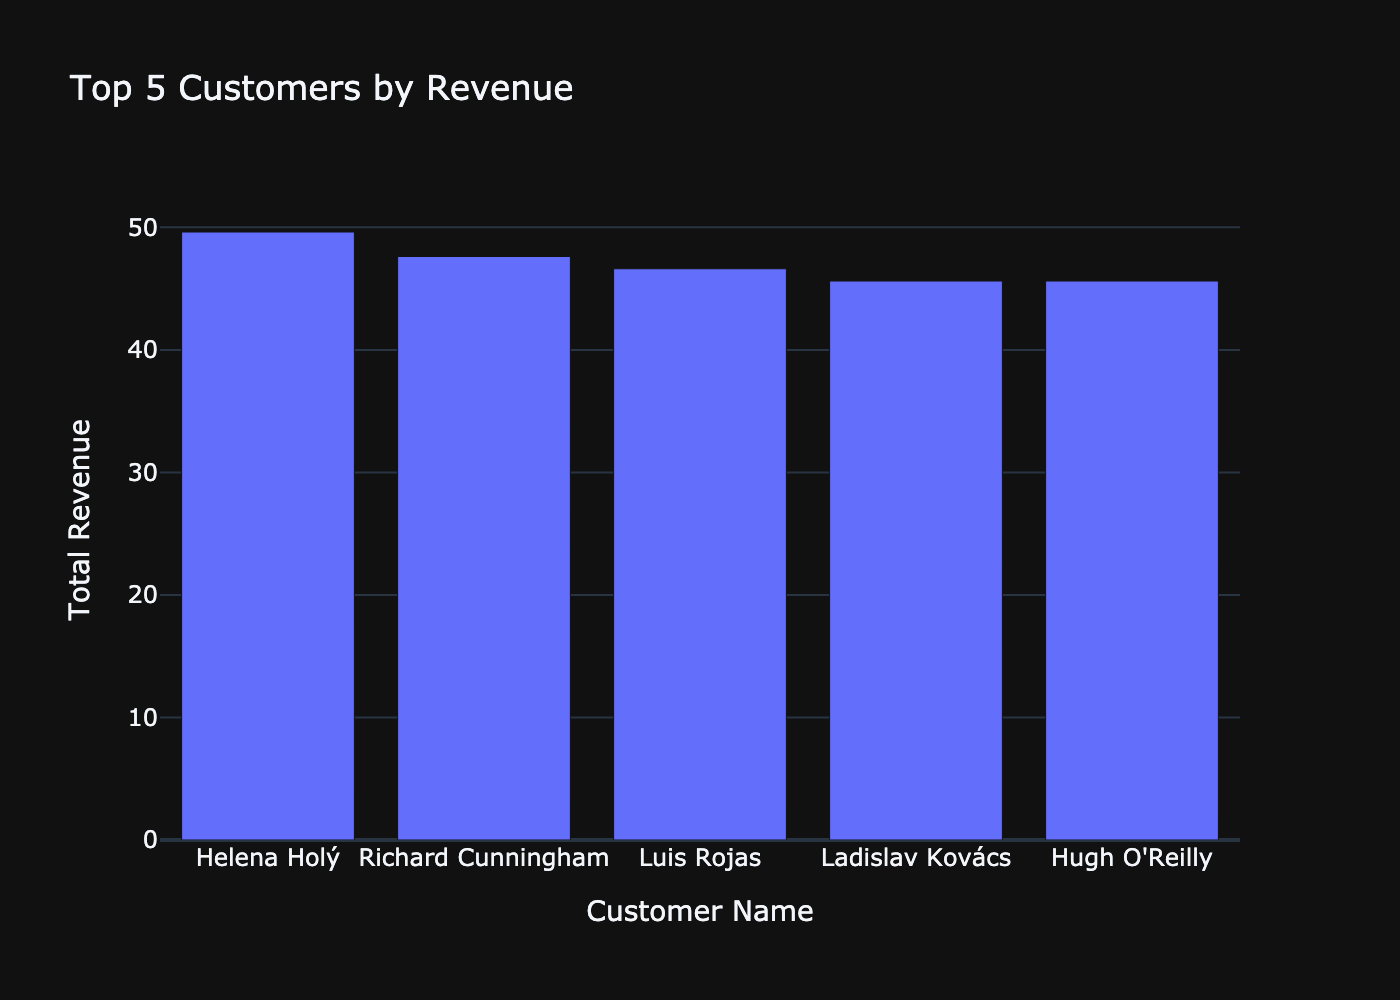

('SELECT c.FirstName, c.LastName, SUM(i.Total) AS TotalRevenue\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId, c.FirstName, c.LastName\nORDER BY TotalRevenue DESC\nLIMIT 5',
   FirstName    LastName  TotalRevenue
 0    Helena        Holý         49.62
 1   Richard  Cunningham         47.62
 2      Luis       Rojas         46.62
 3  Ladislav      Kovács         45.62
 4      Hugh    O'Reilly         45.62,
 Figure({
     'data': [{'type': 'bar',
               'x': array(['Helena Holý', 'Richard Cunningham', 'Luis Rojas', 'Ladislav Kovács',
                           "Hugh O'Reilly"], dtype=object),
               'y': array([49.62, 47.62, 46.62, 45.62, 45.62])}],
     'layout': {'template': '...',
                'title': {'text': 'Top 5 Customers by Revenue'},
                'xaxis': {'title': {'text': 'Customer Name'}},
                'yaxis': {'title': {'text': 'Total Revenue'}}}
 }))

In [6]:
# question = "give me all customers with firstname, lastname and country who are not in the US"
# question = "only show Employees whose title is 'Sales Support Agent'"
question = "give me top 5 customers who generate most revenue"
vn.ask(question=question)

In [15]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
